### Imported Library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

### Importing dataset

In [43]:
fraud_df = pd.read_csv("/kaggle/input/credit-card/creditcard_2023.csv")


### learning about the dataset

In [3]:
fraud_df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [5]:
fraud_df.shape

(568630, 31)

In [6]:
fraud_df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [7]:
fraud_df['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

### Preprocessing

In [44]:
X = fraud_df.drop(['id', 'Class'], axis=1)
y = fraud_df['Class']

# Create a class instance of the scaler
scaler = StandardScaler()

# Fit and transform X
X = scaler.fit_transform(X)

# Split into training and temp datasets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=101)

# Split into validation and test datasets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.3, random_state=101)

### Visualizing the dataset

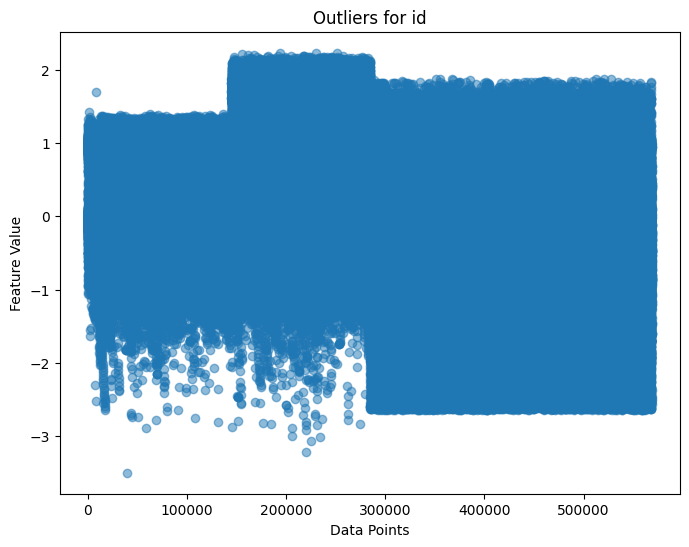

In [14]:
import matplotlib.pyplot as plt

# Choose a specific feature to visualize outliers
feature_index = 0  # Choose the index of the feature to visualize

# Create a scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(range(len(X[:, feature_index])), X[:, feature_index], alpha=0.5)
plt.title(f'Outliers for {fraud_df.columns[feature_index]}')
plt.xlabel('Data Points')
plt.ylabel('Feature Value')
plt.show()


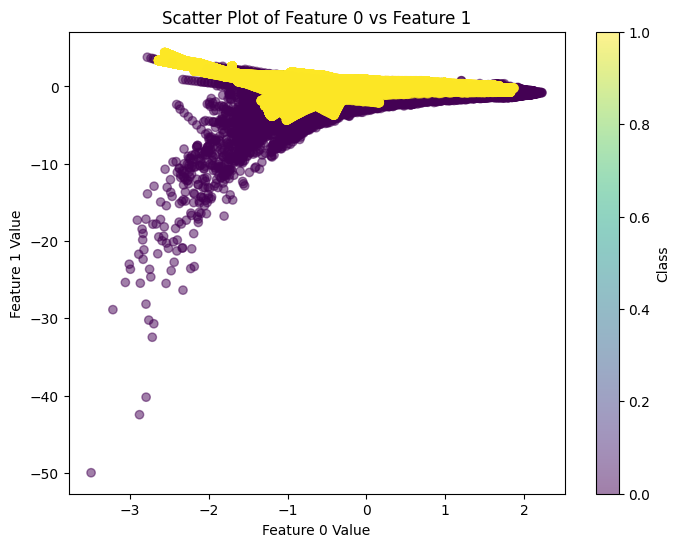

In [15]:
import matplotlib.pyplot as plt

# Choose two specific features to visualize
feature1_index = 0  # Index of the first feature
feature2_index = 1  # Index of the second feature

# Create a scatter plot to visualize the data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, feature1_index], X[:, feature2_index], c=y, cmap='viridis', alpha=0.5)
plt.title(f'Scatter Plot of Feature {feature1_index} vs Feature {feature2_index}')
plt.xlabel(f'Feature {feature1_index} Value')
plt.ylabel(f'Feature {feature2_index} Value')
plt.colorbar(label='Class')
plt.show()


### Removing Outliers


In [45]:
import numpy as np

# Function to remove outliers using Z-score
def remove_outliers_Zscore(X, threshold=3):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    z_scores = np.abs((X - mean) / std)
    filtered_entries = (z_scores < threshold).all(axis=1)
    return X[filtered_entries], filtered_entries

# Remove outliers from the dataset
X_no_outliers, filtered_entries = remove_outliers_Zscore(X)

# Remove corresponding entries from the labels
y_no_outliers = y[filtered_entries]

### Building and evaluation the Model 

In [59]:
from keras.layers import LeakyReLU
# Define input and output_dim
input_dim = 29
output_dim = 1

# Create Sequential model
modela = Sequential()


# Add layers with LeakyReLU activation
modela.add(Dense(64, input_dim=input_dim))
modela.add(LeakyReLU(alpha=0.1))  # You can adjust the slope 'alpha' as needed
modela.add(Dense(64))  # Additional hidden layer with 64 neurons
modela.add(LeakyReLU(alpha=0.1))  # Adjust the slope 'alpha' if required
modela.add(Dense(32))  # Additional hidden layer with 64 neurons
modela.add(LeakyReLU(alpha=0.1))  # Adjust the slope 'alpha' if required
modela.add(Dense(32))
modela.add(LeakyReLU(alpha=0.1))  # Adjust the slope 'alpha' if required
modela.add(Dense(output_dim, activation='sigmoid'))

# Compile
modela.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit
modela.fit(X_train, y_train, epochs=4, batch_size=250, validation_data=(X_val, y_val))

Epoch 1/4
1820/1820 [==============================] - 5s 2ms/step - loss: 0.0370 - accuracy: 0.9872 - val_loss: 0.0062 - val_accuracy: 0.9986
Epoch 2/4
1820/1820 [==============================] - 4s 2ms/step - loss: 0.0061 - accuracy: 0.9985 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 3/4
1820/1820 [==============================] - 4s 2ms/step - loss: 0.0044 - accuracy: 0.9989 - val_loss: 0.0033 - val_accuracy: 0.9992
Epoch 4/4
1820/1820 [==============================] - 4s 2ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.0028 - val_accuracy: 0.9994


In [60]:
loss, accuracy = modela.evaluate(X_test, y_test)

print("Loss: ", round(loss, 2))
print("Accuracy: ", round(accuracy * 100, 2), "%")

2488/2488 [==============================] - 3s 1ms/step - loss: 0.0037 - accuracy: 0.9992
Loss:  0.0
Accuracy:  99.92 %
